<a href="https://colab.research.google.com/github/Swastik02aug/SML-Regression-Capstone-Project/blob/main/project(yes_bank).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**


**Importing all required libraries.**

In [66]:
import numpy as np                                     # numerical computations
import pandas as pd                                    #data manipulation
import matplotlib.pyplot as plt                        #visulaisations with plot
%matplotlib inline
import seaborn as s
from numpy import math
from sklearn.preprocessing import MinMaxScaler         #scaling the data
from sklearn.model_selection import train_test_split   # split train and test data
from sklearn.model_selection import (cross_val_score,  # split train and test data on a timeseries
TimeSeriesSplit)

from sklearn.linear_model import LinearRegression      # regression model
from xgboost import XGBRegressor                       # xgboost model
from sklearn.ensemble import RandomForestRegressor     # random forest model
from sklearn.svm import SVR                            # support vector regressor
from sklearn.linear_model import (Lasso, Ridge,        # regularization
ElasticNet, LassoCV, RidgeCV, ElasticNetCV)

from sklearn.model_selection import GridSearchCV       # grid search to optimize parameters
from sklearn.metrics import (r2_score,                 # import required metrics
mean_squared_error,  mean_absolute_percentage_error, 
mean_absolute_error)

from datetime import datetime                          # to convert to date
from statsmodels.tsa.arima_model import ARIMA          # to build ARIMA
from prophet import Prophet                            # to build prophet

from dateutil.relativedelta import relativedelta       # working with dates with style
from datetime import datetime                          # computational cost
from scipy.optimize import minimize                    # for function minimization
import copy                                            # create copie


from statsmodels.tsa.stattools import adfuller         # statistics and econometrics
import statsmodels.formula.api as smf                  
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs


import warnings                                        # do not disturb mode
warnings.filterwarnings('ignore')

In [4]:
#mounting drive for importing data set from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/capstone project 2(yes bank)/data_YesBank_StockPrices.csv')

**WRANGLING OF THE DATA:**

In [6]:
#HEAD FUCTION IS USED TO PRINT OUT THE FIRST FIVE ROWS OF THRE DATA SETS
dataset.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [8]:
#DESCRIBE METHOD IS USE PROVIDES THE COUNT ,MEAN,MEDIAN,,STD,MIN ETC VALUES
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


In [14]:
#NUNIQUE IS USED TO PROVIDES THE NUMBERS OF UNIQUES VALUES PRESENT IN EACH COLUMN
dataset.nunique()

Date     185
Open     183
High     184
Low      183
Close    185
dtype: int64

In [15]:
#DTYPES IS USED TO PROVIDES DATA TYPES OF EACH COLUMN VALUE
dataset.dtypes

Date      object
Open     float64
High     float64
Low      float64
Close    float64
dtype: object

In [16]:
#INFO IS USED TO PROVIDES COUNT,DTYPE,AND NULL OR NON COLUMN VALUES
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [55]:
#IT IS USED TO FIND OUT THE SUM OF ALLNULL VALUES
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [35]:
#IT IS USED TO FIND OT THE NUMBERS OF ROWS AND COLUMN OF THE DATA
dataset.shape

(185, 5)

In [58]:
dataset['Date'][0][0:3]

'Jul'

In [68]:
# Create dummy variables for the catgeorical variable State
'''dataset['july'] = np.where(dataset['Date'][0:3]=='Jul', 1, 0)
dataset['auguest'] = np.where(dataset['Date'][0:3]=='Aug', 1, 0)
dataset['september'] = np.where(dataset['Date'][0:3]=='sep', 1, 0)
dataset['october'] = np.where(dataset['Date'][0:3]=='Oct', 1, 0)
dataset['november'] = np.where(dataset['Date'][0:3]=='Nov', 1, 0)

# Drop the original column State from the dataframe
#dataset.drop(columns=['State'],axis=1,inplace=True)'''

"dataset['july'] = np.where(dataset['Date'][0:3]=='Jul', 1, 0)\ndataset['auguest'] = np.where(dataset['Date'][0:3]=='Aug', 1, 0)\ndataset['september'] = np.where(dataset['Date'][0:3]=='sep', 1, 0)\ndataset['october'] = np.where(dataset['Date'][0:3]=='Oct', 1, 0)\ndataset['november'] = np.where(dataset['Date'][0:3]=='Nov', 1, 0)\n\n# Drop the original column State from the dataframe\n#dataset.drop(columns=['State'],axis=1,inplace=True)"

In [60]:
dataset.head()

,Date,Open,High,Low,Close,july,auguest,september,october,november
0,Jul-05,13.00,14.00,11.25,12.46,1,0,0,0,0
1,Aug-05,12.58,14.88,12.55,13.42,1,0,0,0,0
2,Sep-05,13.48,14.87,12.27,13.30,1,0,0,0,0
3,Oct-05,13.20,14.47,12.40,12.99,1,0,0,0,0
4,Nov-05,13.35,13.88,12.88,13.41,1,0,0,0,0


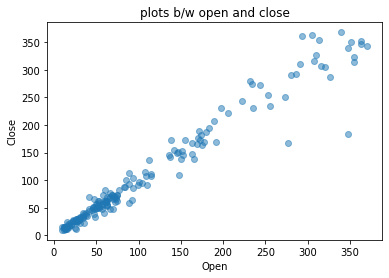

In [24]:
#PLOTTING THE SCATTER PLOT B/W OPEN AND CLOSE COLUMN DATA
plt.scatter(dataset['Open'],dataset['Close'],alpha=.5)
plt.title('plots b/w open and close')
plt.xlabel('Open')
plt.ylabel('Close')
plt.show()

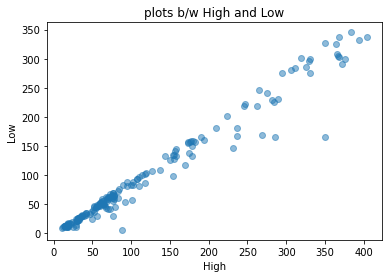

In [25]:
#PLOTTING THE SCATTER PLOT B/W HIGH AND LOW COLUMN DATA
plt.scatter(dataset['High'],dataset['Low'],alpha=.5)
plt.title('plots b/w High and Low')
plt.xlabel('High')
plt.ylabel('Low')
plt.show()

In [26]:
dependent_variable = 'Close'

In [27]:
# Create a list of independent variables
independent_variables = list(set(dataset.columns.tolist()) - {dependent_variable})

In [28]:
independent_variables

['Open', 'Low', 'Date', 'High']

In [29]:
# Create the data of independent variables
X = dataset[independent_variables].values

# Create the dependent variable data
y = dataset[dependent_variable].values

In [30]:
dataset[independent_variables]

,Open,Low,Date,High
0,13.00,11.25,Jul-05,14.00
1,12.58,12.55,Aug-05,14.88
2,13.48,12.27,Sep-05,14.87
3,13.20,12.40,Oct-05,14.47
4,13.35,12.88,Nov-05,13.88
...,...,...,...,...
180,25.60,11.10,Jul-20,28.30
181,12.00,11.85,Aug-20,17.16
182,14.30,12.75,Sep-20,15.34
183,13.30,12.11,Oct-20,14.01


In [31]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [32]:
X_train[0:10]

array([[142.08, 134.0, 'Dec-14', 155.0],
       [16.2, 16.02, 'Mar-06', 20.95],
       [92.4, 57.71, 'Jul-13', 100.4],
       [59.5, 40.95, 'Sep-19', 72.55],
       [10.04, 9.94, 'Apr-09', 17.51],
       [49.2, 44.8, 'Sep-13', 78.94],
       [47.8, 47.3, 'Mar-10', 52.06],
       [35.98, 35.02, 'Jul-07', 41.04],
       [49.99, 30.24, 'Jan-08', 55.56],
       [25.6, 11.1, 'Jul-20', 28.3]], dtype=object)

In [67]:
'''# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)'''

'# Transforming data\nscaler = MinMaxScaler()\nX_train = scaler.fit_transform(X_train)\nX_test = scaler.transform(X_test)'